In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import math
import random
import statistics
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Training.csv")

### Label Encoding & One Hot Encoding

In [ ]:
# Label Encoding
le = LabelEncoder()
le.fit(data['prognosis'])
Y = le.transform(data['prognosis'])
data['prognosis_encoded']= le.fit_transform(data['prognosis'])
data['prognosis_encoded'].unique()


# One Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data["prognosis"].values.reshape(-1, 1))
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["prognosis"]))
one_hot_df = one_hot_df.astype(int)
unique_values = data["prognosis"].unique()
new_column_names = {old_name: value for old_name, value in zip(one_hot_df.columns, unique_values)}
one_hot_df.rename(columns=new_column_names, inplace=True)
data_encoded = pd.concat([data, one_hot_df], axis=1)
data_encoded = data_encoded.drop(["prognosis"], axis=1)
data_encoded = data_encoded.drop(["prognosis_encoded"], axis=1)

In [ ]:
y = one_hot_df
X = data_encoded.drop(y, axis=1)

## Genetic Algorithm

In [ ]:
# Population Intialization

population = np.random.randint(0, 2, (100,132))
print(population.shape)
print(population)

(100, 132)
[[0 0 1 ... 0 1 0]
 [1 1 0 ... 1 0 0]
 [0 0 0 ... 0 1 1]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 1 ... 1 0 1]
 [0 0 1 ... 0 1 1]]


In [ ]:
# Fitness Function

def fitness_function(population,X,y):
   fitness = []
   X1 = np.array(X)
   for chromosome in population:
    chr2 = chromosome
    chr1 = [True if chr2[i]==1 else False for i in range(chr2.shape[0])]
    X2 = X1[:,chr1]
    model = DecisionTreeClassifier()
    scores = cross_val_score(model,X1,y,scoring='f1_macro',n_jobs=-1,cv=2)
    fitness.append(scores.mean())
   plt.xlabel('Population')
   plt.ylabel('F1 Scores')
   plt.plot(fitness)
   plt.show()
   return fitness

In [ ]:
# Parent Selection

def select_parents(population,fitness_values):
    parents = []
    population_size = len(population)
    for count in range(population_size):
      random_number = random.uniform(0, 1)
      individual_number = 0
      for score in fitness_values:
        if(random_number<=score):
          parents.append(population[individual_number])
          break
        individual_number+=1
    return parents

In [ ]:
# CrossOver

def two_point_crossover(parents, probability):
    random.shuffle(parents)

    no_of_pairs = round(len(parents) * probability / 2)
    chromosome_len = len(parents[0])
    crossover_population = []

    for num in range(no_of_pairs):
        length = len(parents)
        parent1_index = random.randrange(length)
        parent2_index = random.randrange(length)
        while parent1_index == parent2_index:
            parent2_index = random.randrange(length)

        start = random.randrange(chromosome_len)
        end = random.randrange(chromosome_len)
        if start > end:
            start, end = end, start

        parent1 = parents[parent1_index]
        parent2 = parents[parent2_index]

        child1 = np.concatenate((parent1[0:start], parent2[start:end], parent1[end:]))
        child2 = np.concatenate((parent2[0:start], parent1[start:end], parent2[end:]))

        parents = np.delete(parents, [parent1_index, parent2_index], axis=0)
        crossover_population.append(child1)
        crossover_population.append(child2)

    if len(parents) > 0:
        crossover_population.extend(parents)

    return crossover_population


In [ ]:
def mutation(crossover_population):
    for individual in crossover_population:
      index_1 = random.randrange(len(individual))
      index_2 = random.randrange(len(individual))
      while(index_2==index_1 and individual[index_1] != individual[index_2]):
        index_2 = random.randrange(len(individual))
      temp = individual[index_1]
      individual[index_1] = individual[index_2]
      individual[index_2] = temp

    return crossover_population

### Decision Tree

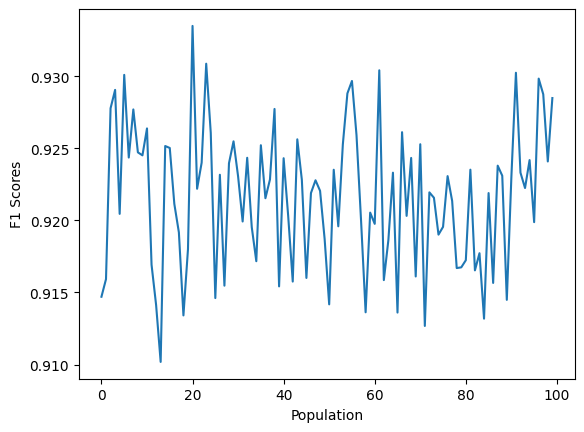


 Generation : 1


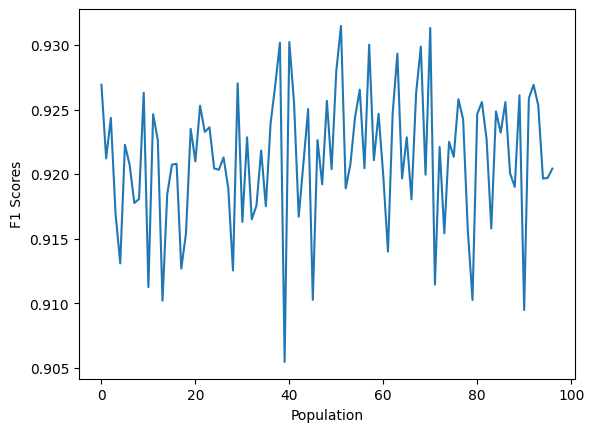


 Generation : 2


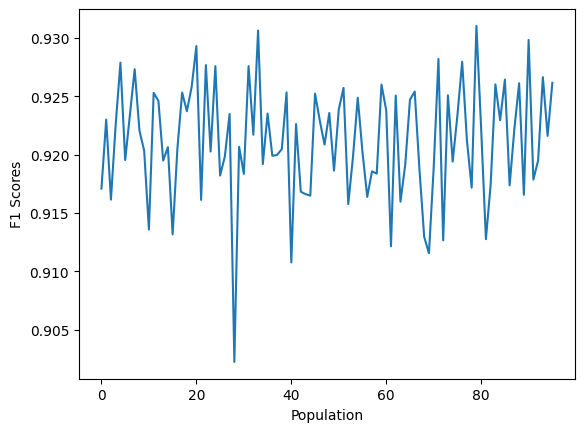


 Generation : 3


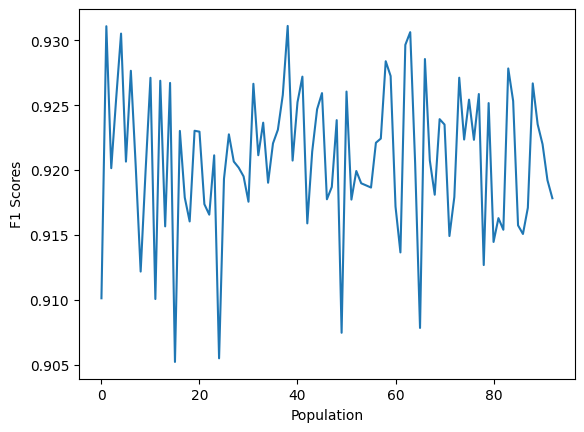


 Generation : 4


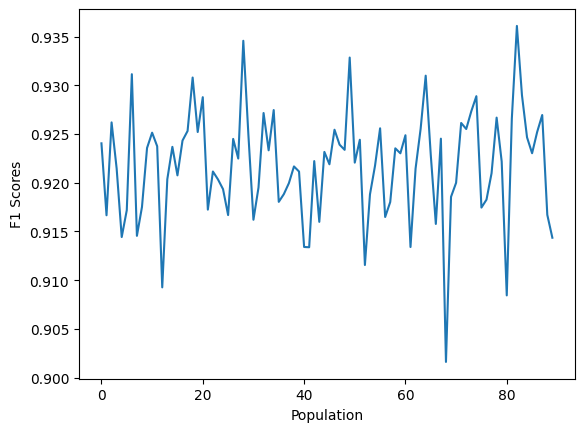


 Generation : 5


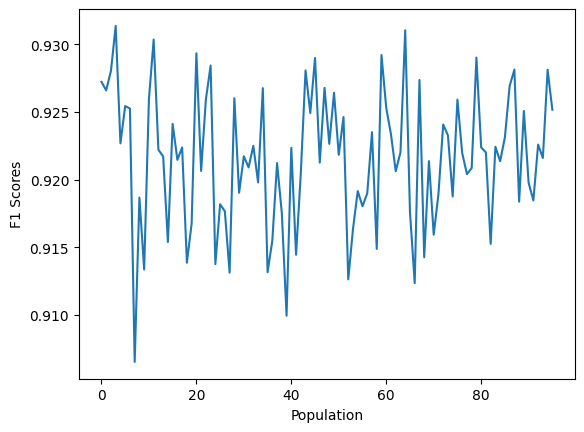


 Generation : 6


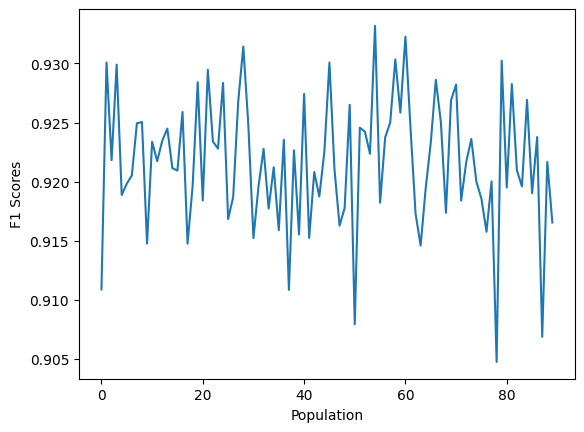


 Generation : 7


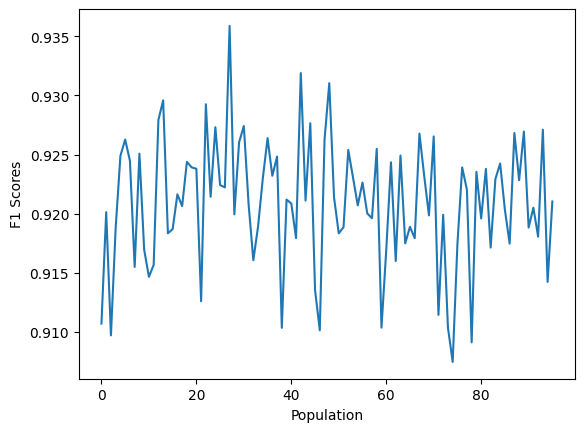


 Generation : 8


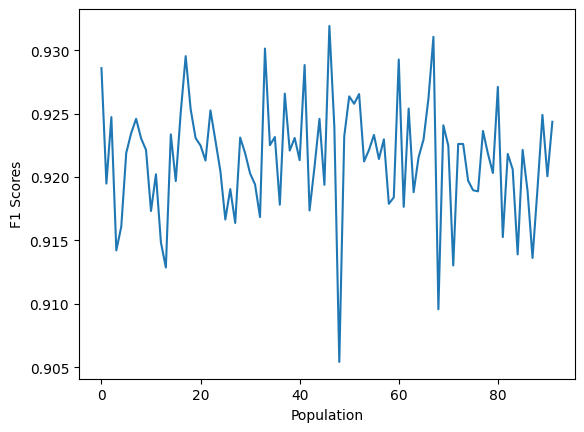


 Generation : 9


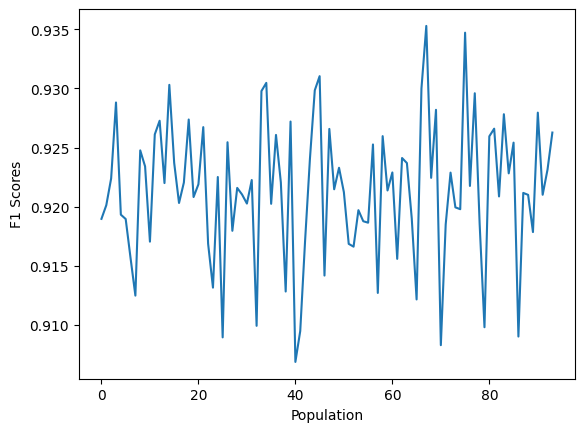


 Generation : 10


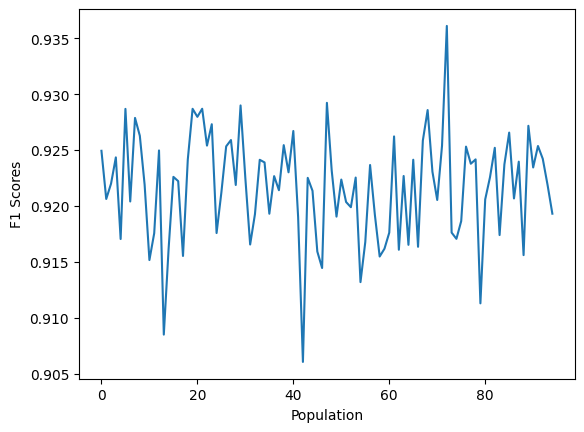


 Generation : 11


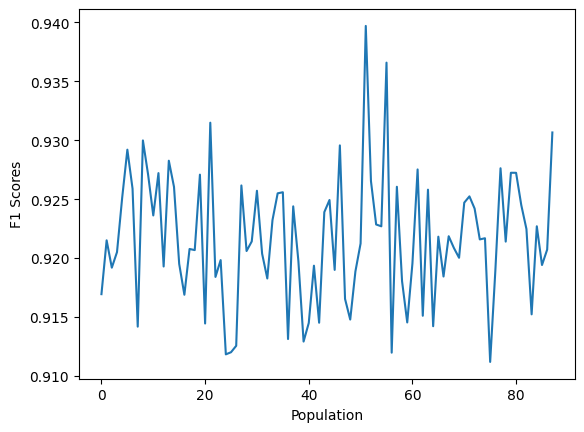


 Generation : 12


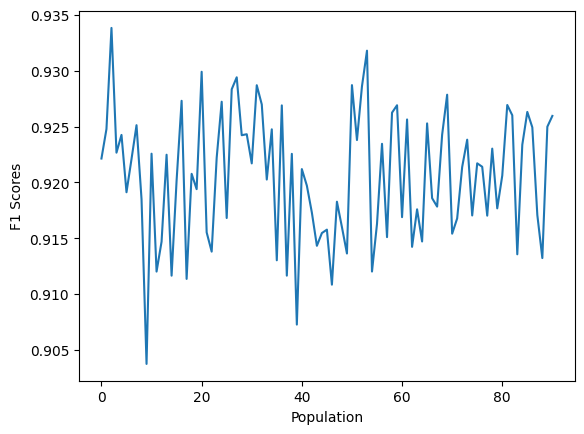


 Generation : 13


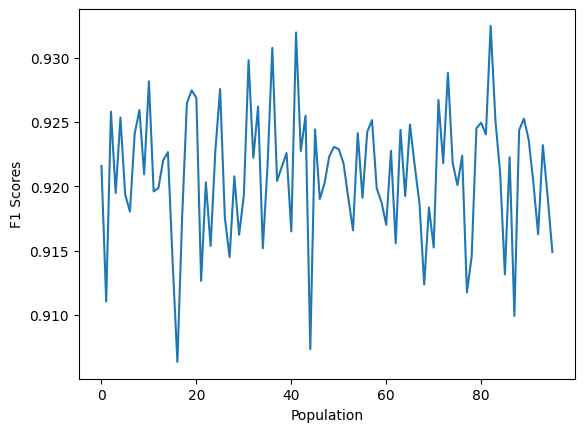


 Generation : 14


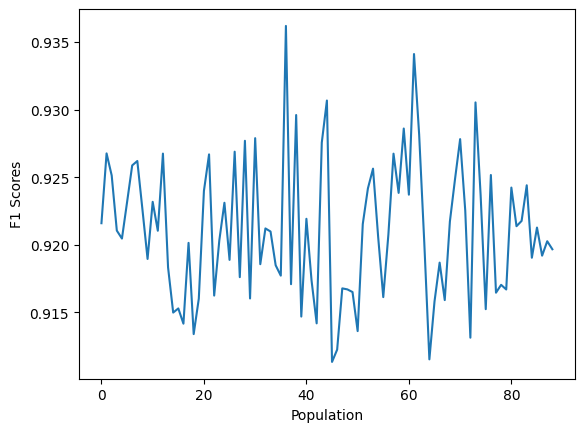


 Generation : 15


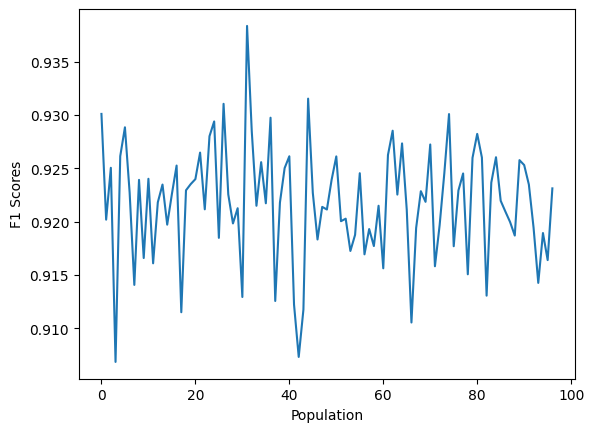

In [ ]:
fitness_values = fitness_function(population, X, y)
max_fitness = []
max_features = []
gen = []
for i in range(15):
   gen.append(i+1)
   print("\n Generation :",i+1)
   parents = select_parents(population, fitness_values)
   crossover_population = two_point_crossover(parents, 0.78)
   mutation(crossover_population)
   fitness_values = fitness_function(crossover_population, X, y)
   a = max(fitness_values)
   index_pop = fitness_values.index(a)
   max_fitness.append(a)
   b = crossover_population[index_pop]
   max_features.append(b)

In [ ]:
len(crossover_population)

97

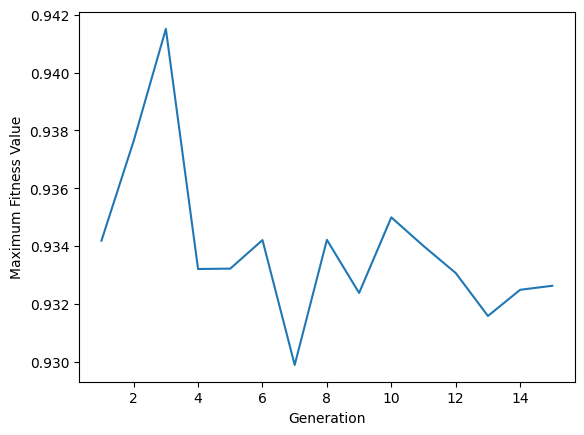

In [ ]:
plt.plot(gen,max_fitness)
plt.ylabel('Maximum Fitness Value')
plt.xlabel('Generation')
plt.show()

In [ ]:
best_features = []
best_f1_score = max(max_fitness)
best_fitness_index = max_fitness.index(max(max_fitness))
best_features = max_features[best_fitness_index]

In [ ]:
selected_column_names = [X.columns[i] for i in range(len(best_features)) if best_features[i] == 1]
print("Selected Column Names:", selected_column_names)
print(best_f1_score)

Selected Column Names: ['skin_rash', 'continuous_sneezing', 'shivering', 'chills', 'cold_hands_and_feets', 'lethargy', 'patches_in_throat', 'high_fever', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'constipation', 'abdominal_pain', 'yellow_urine', 'yellowing_of_eyes', 'swelling_of_stomach', 'throat_irritation', 'chest_pain', 'weakness_in_limbs', 'pain_during_bowel_movements', 'cramps', 'obesity', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'swollen_extremeties', 'extra_marital_contacts', 'slurred_speech', 'hip_joint_pain', 'stiff_neck', 'movement_stiffness', 'loss_of_balance', 'unsteadiness', 'bladder_discomfort', 'foul_smell_of urine', 'passage_of_gases', 'internal_itching', 'toxic_look_(typhos)', 'depression', 'irritability', 'dischromic _patches', 'watering_from_eyes', 'receiving_blood_transfusion', 'stomach_bleeding', 'distention_of_abdomen', 'blood_in_sputum', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'yell

In [ ]:
len(selected_column_names)

52

In [ ]:
X_selected = X[selected_column_names]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8323170731707317
F1 Score: 0.8448184719904985


### Random Forest

In [ ]:
# Fitness Function with Random Forest

def fitness_function_RF(population,X,y):
   fitness = []
   X1 = np.array(X)
   for chromosome in population:
    chr2 = chromosome
    chr1 = [True if chr2[i]==1 else False for i in range(chr2.shape[0])]
    X2 = X1[:,chr1]
    model = RandomForestClassifier()
    scores = cross_val_score(model,X1,y,scoring='f1_macro',n_jobs=-1,cv=2)
    fitness.append(scores.mean())
   plt.xlabel('Population')
   plt.ylabel('F1 Scores')
   plt.plot(fitness)
   plt.show()
   return fitness

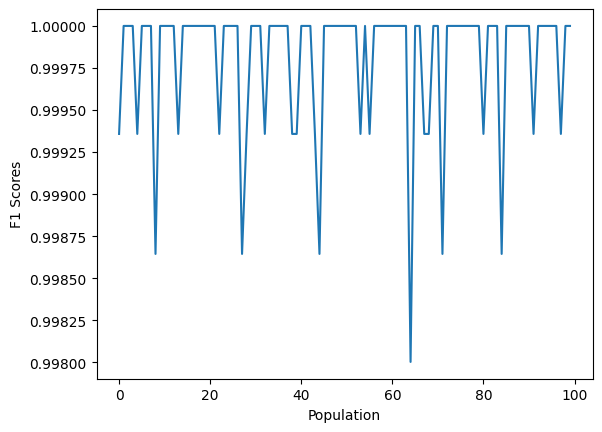


 Generation : 1


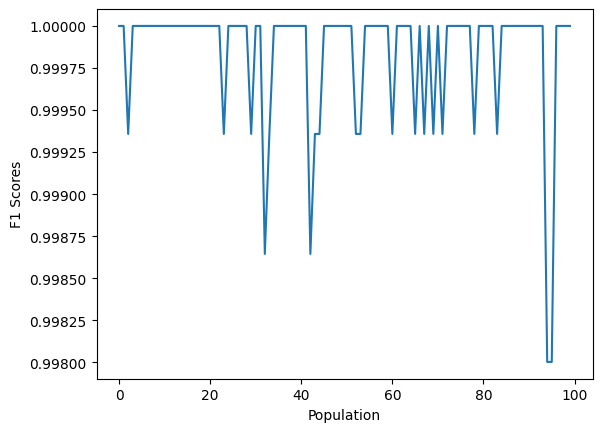


 Generation : 2


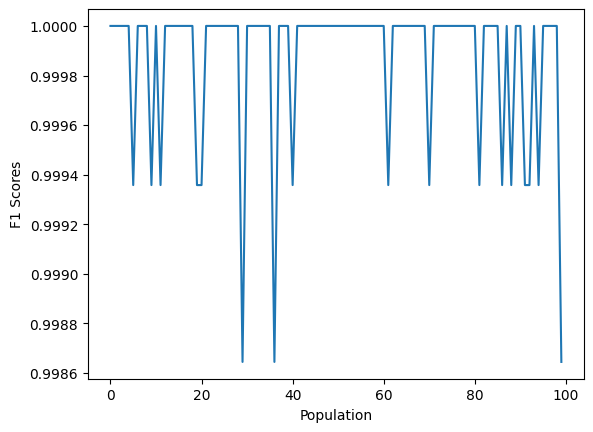


 Generation : 3


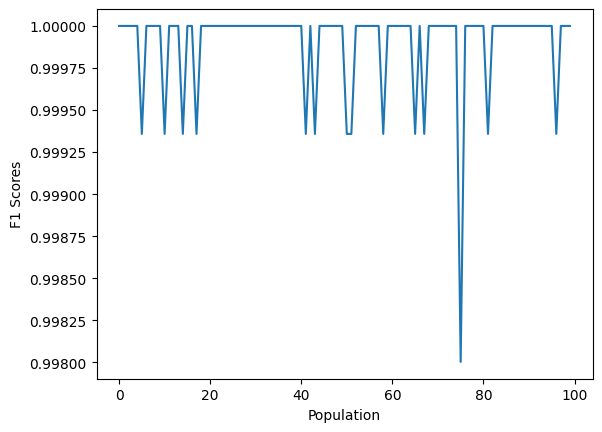


 Generation : 4


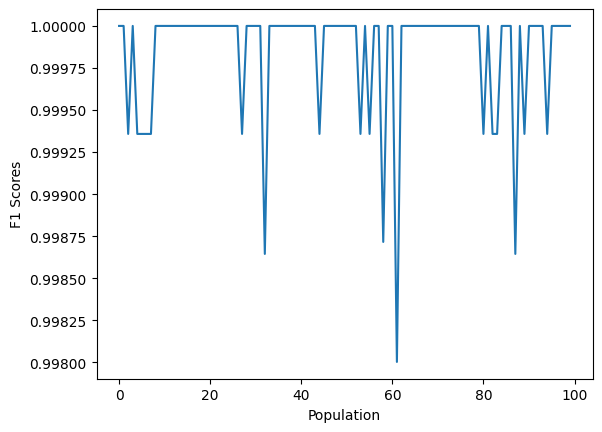


 Generation : 5


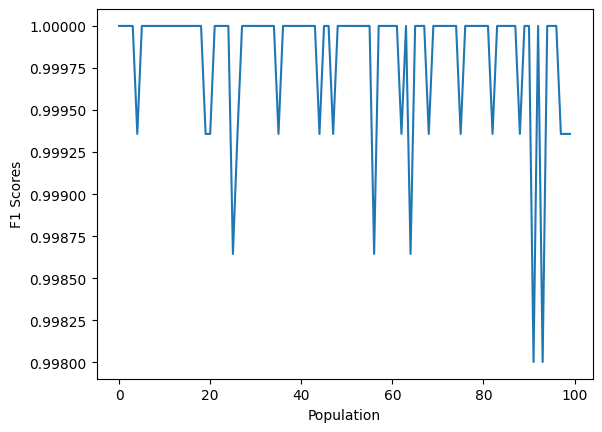


 Generation : 6


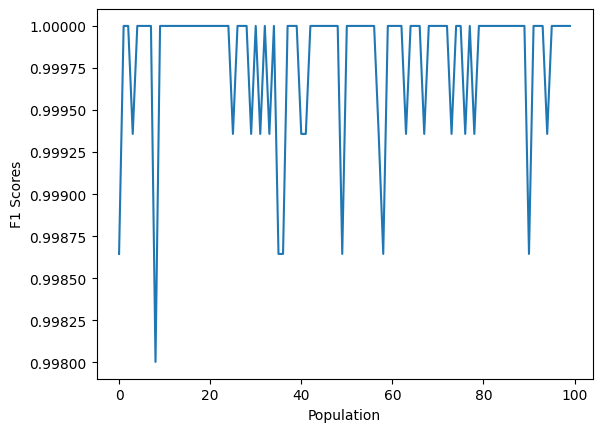


 Generation : 7


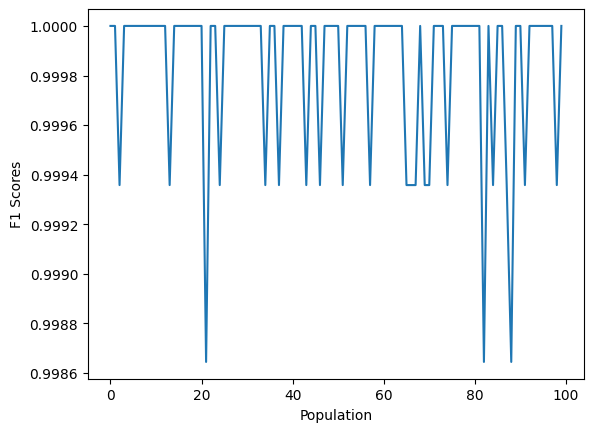


 Generation : 8


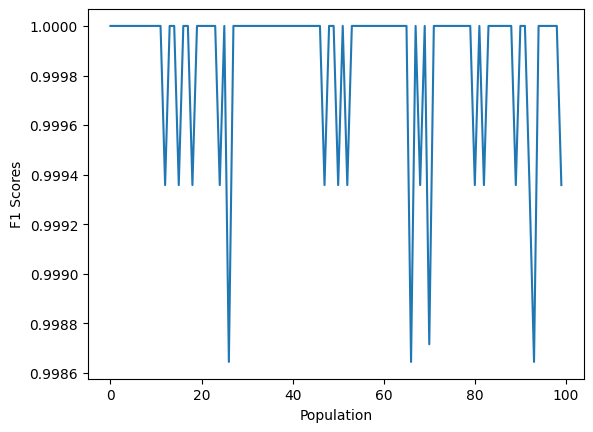


 Generation : 9


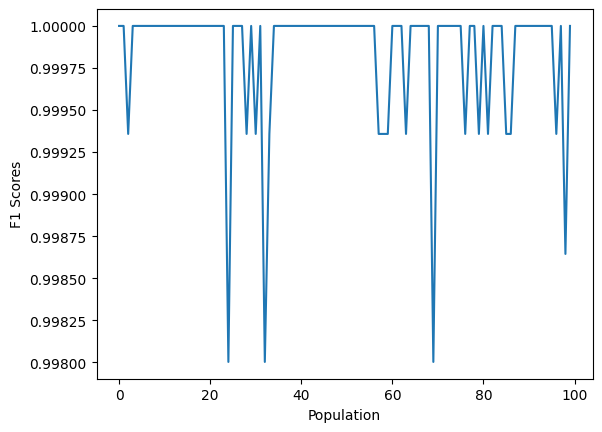


 Generation : 10


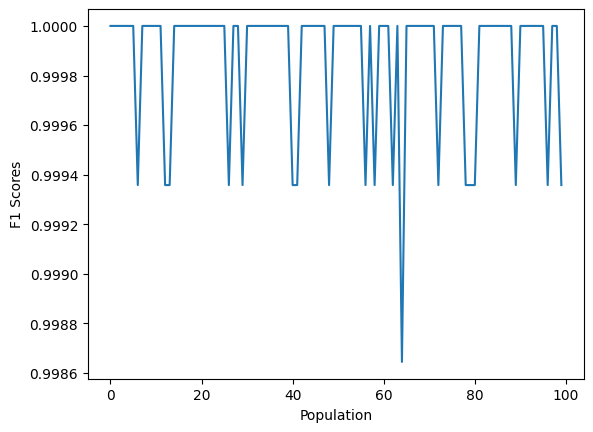


 Generation : 11


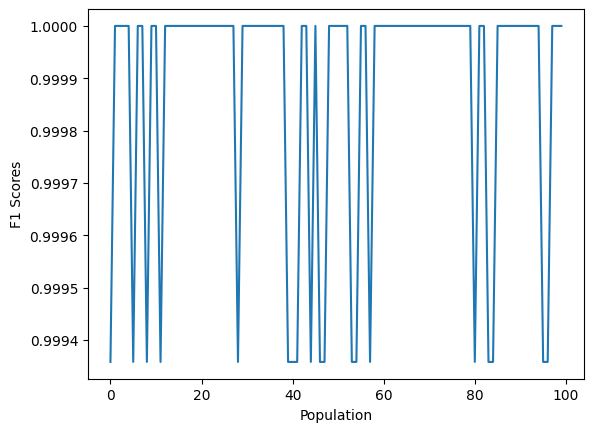


 Generation : 12


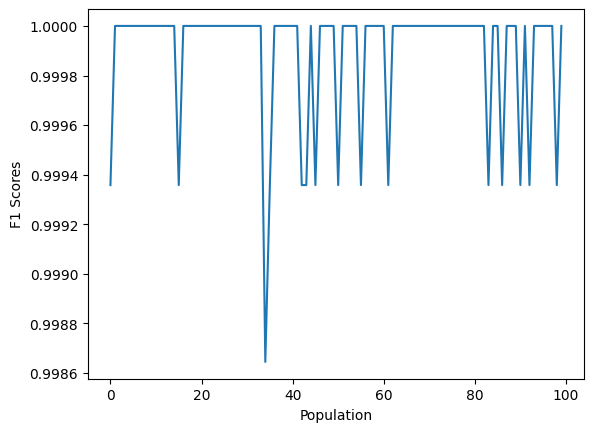


 Generation : 13


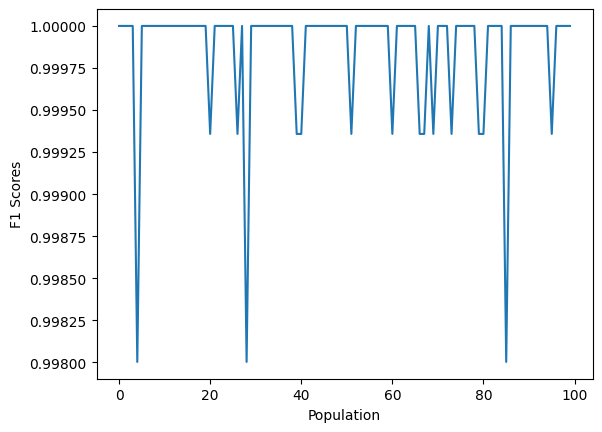


 Generation : 14


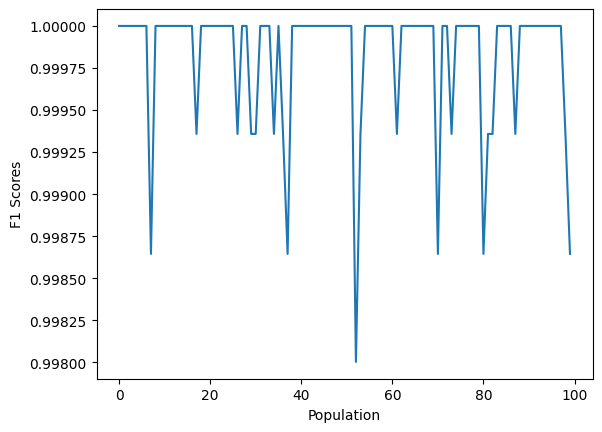


 Generation : 15


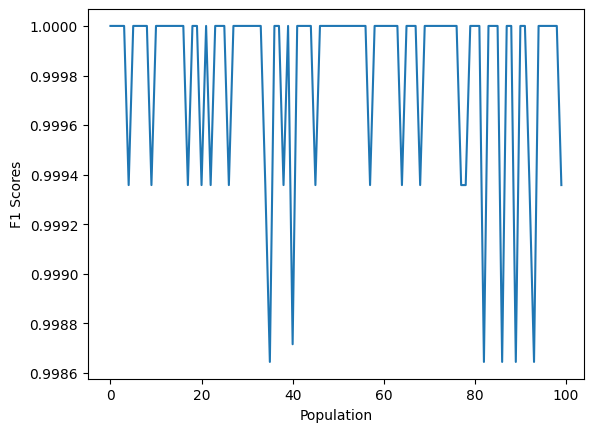

In [ ]:
fitness_values = fitness_function_RF(population, X, y)
max_fitness = []
max_features = []
gen = []
for i in range(15):
   gen.append(i+1)
   print("\n Generation :",i+1)
   parents = select_parents(population, fitness_values)
   crossover_population = two_point_crossover(parents, 0.78)
   mutation(crossover_population)
   fitness_values = fitness_function_RF(crossover_population, X, y)
   a = max(fitness_values)
   index_pop = fitness_values.index(a)
   max_fitness.append(a)
   b = crossover_population[index_pop]
   max_features.append(b)

In [ ]:
best_features = []
best_f1_score = max(max_fitness)
best_fitness_index = max_fitness.index(max(max_fitness))
best_features = max_features[best_fitness_index]

In [ ]:
selected_column_names = [X.columns[i] for i in range(len(best_features)) if best_features[i] == 1]
print("Selected Column Names:", selected_column_names)
print(best_f1_score)

Selected Column Names: ['nodal_skin_eruptions', 'shivering', 'ulcers_on_tongue', 'muscle_wasting', 'burning_micturition', 'fatigue', 'cold_hands_and_feets', 'mood_swings', 'restlessness', 'lethargy', 'irregular_sugar_level', 'cough', 'breathlessness', 'sweating', 'indigestion', 'dark_urine', 'loss_of_appetite', 'back_pain', 'diarrhoea', 'yellow_urine', 'swelled_lymph_nodes', 'malaise', 'throat_irritation', 'redness_of_eyes', 'congestion', 'chest_pain', 'weakness_in_limbs', 'pain_in_anal_region', 'irritation_in_anus', 'neck_pain', 'swollen_legs', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'drying_and_tingling_lips', 'knee_pain', 'hip_joint_pain', 'movement_stiffness', 'spinning_movements', 'loss_of_smell', 'bladder_discomfort', 'continuous_feel_of_urine', 'passage_of_gases', 'toxic_look_(typhos)', 'depression', 'muscle_pain', 'altered_sensorium', 'belly_pain', 'dischromic _patches', 'increased_appetite', 'polyuria', 'lack_of_concentration', 'visual_disturbances', 'recei

In [ ]:
print(len(selected_column_names))

67


In [ ]:
X_selected = X[selected_column_names]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9796747967479674
F1 Score: 0.985994547030956


## With selected features


In [ ]:
columns_to_count = [col for col in data.columns if col not in ["prognosis", "prognosis_encoded"]]
ones_count = data[columns_to_count].sum()
selected_columns = ones_count[ones_count > 120].index
new_df = data[selected_columns]

correlation_matrix = new_df.corr()
columns_to_drop = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.90:
            colname = correlation_matrix.columns[j]
            if colname not in columns_to_drop:
                columns_to_drop.append(colname)

X_fil = new_df.drop(columns=columns_to_drop)

In [ ]:
# Population Intialization

population = np.random.randint(0, 2, (100,49))
print(population.shape)
print(population)


(100, 49)
[[1 1 1 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 1 0]
 [0 1 1 ... 1 0 0]
 [0 0 0 ... 1 1 1]]


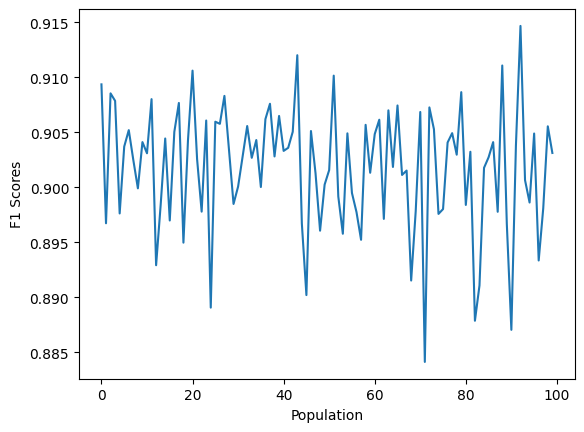


 Generation : 1


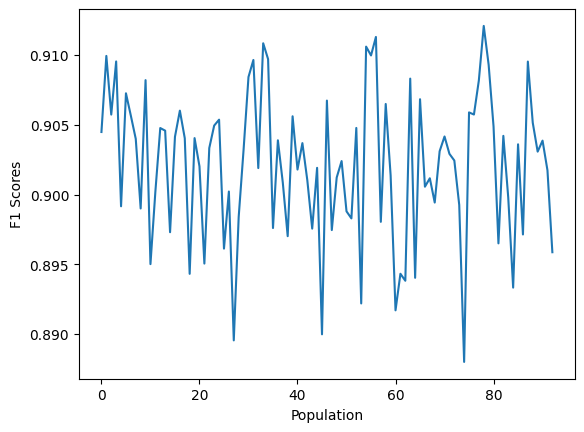


 Generation : 2


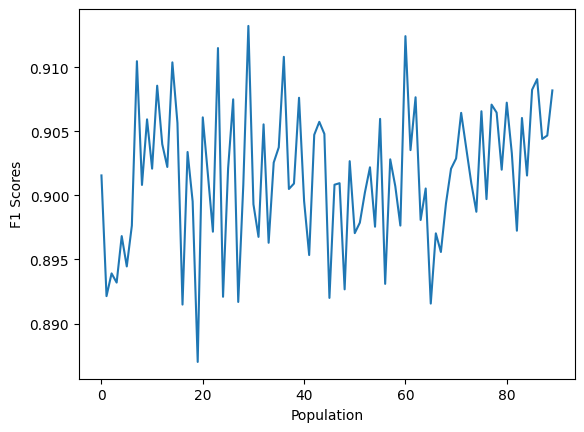


 Generation : 3


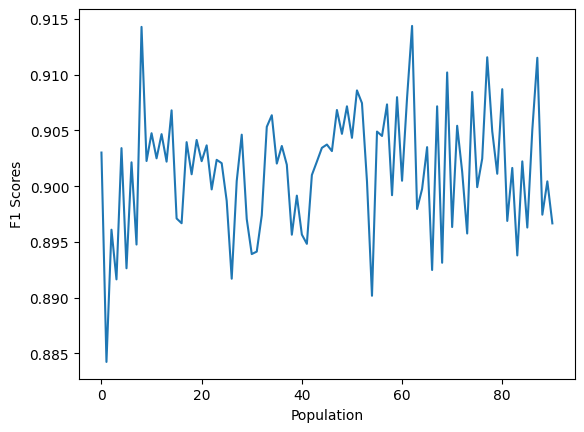


 Generation : 4


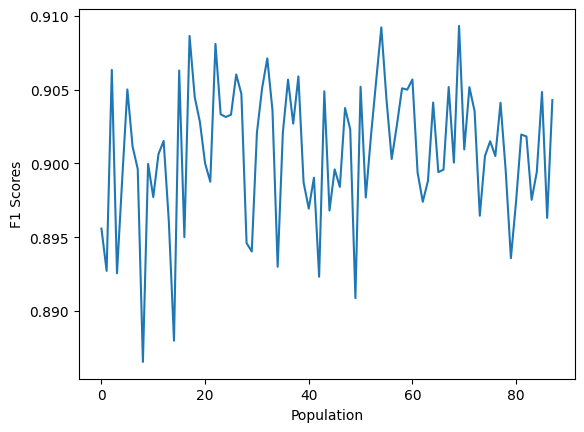


 Generation : 5


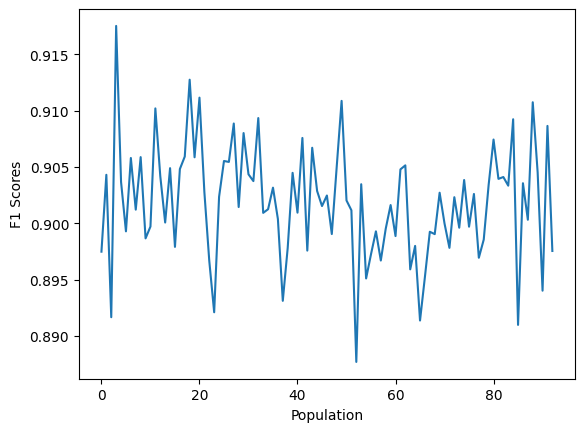


 Generation : 6


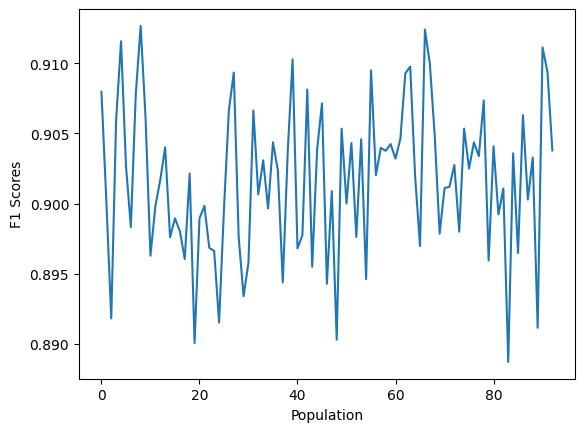


 Generation : 7


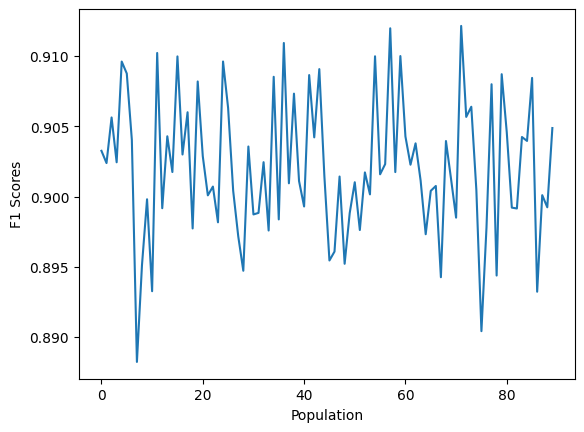


 Generation : 8


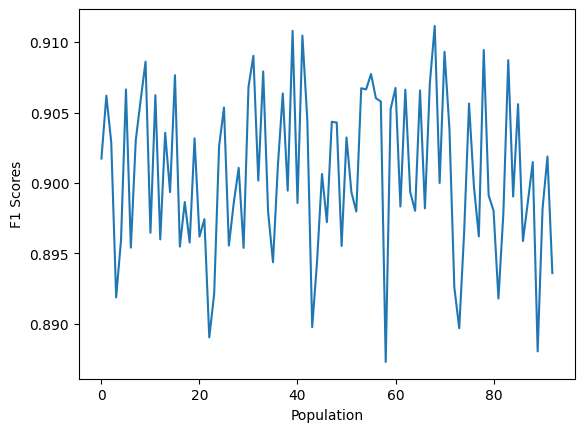


 Generation : 9


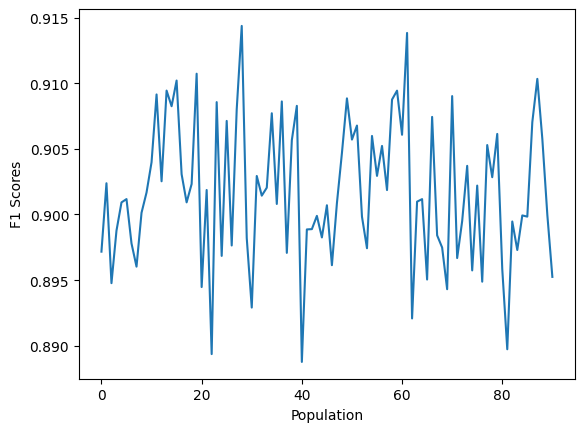


 Generation : 10


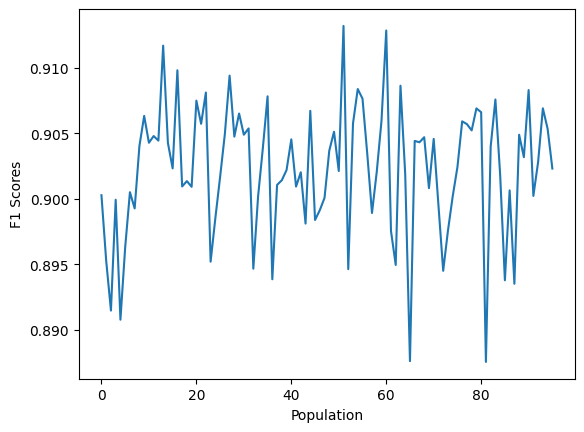


 Generation : 11


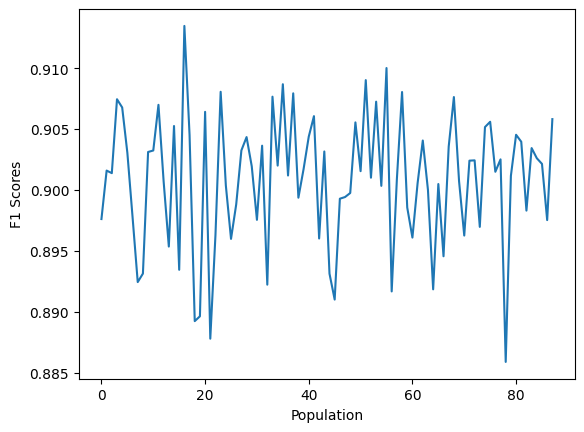


 Generation : 12


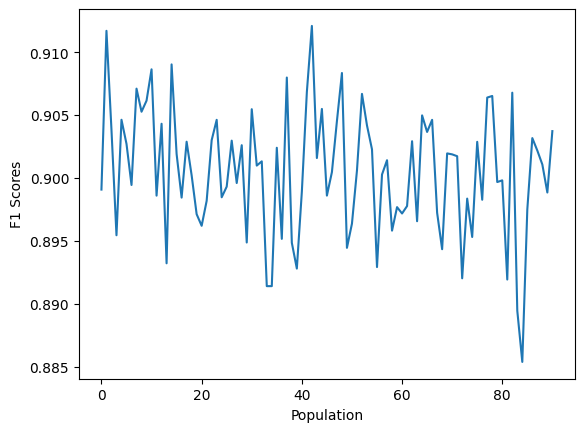


 Generation : 13


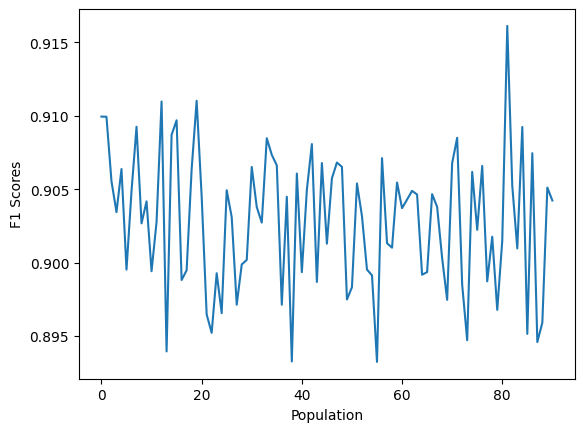


 Generation : 14


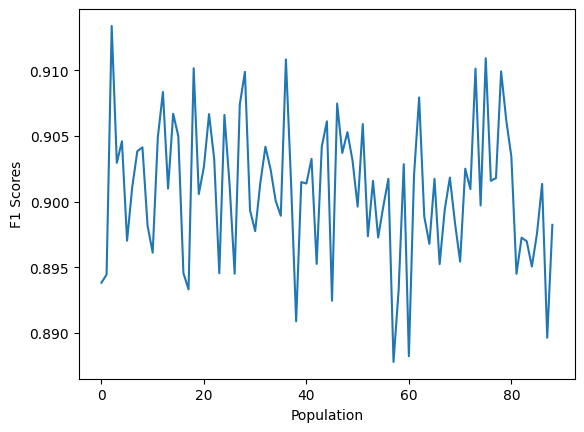


 Generation : 15


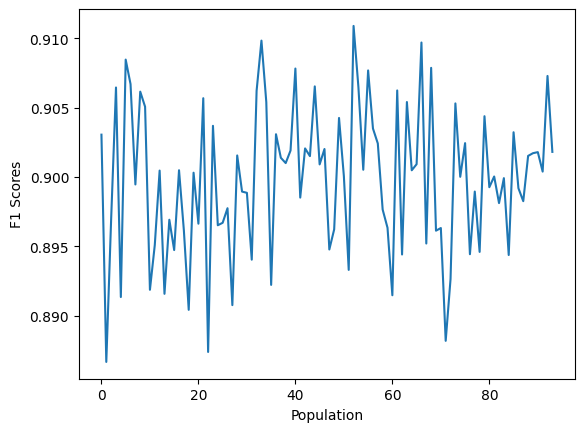

In [ ]:
fitness_values = fitness_function(population, X_fil, y)
max_fitness = []
max_features = []
gen = []
for i in range(15):
   gen.append(i+1)
   print("\n Generation :",i+1)
   parents = select_parents(population, fitness_values)
   crossover_population = two_point_crossover(parents, 0.78)
   mutation(crossover_population)
   fitness_values = fitness_function(crossover_population, X_fil, y)
   a = max(fitness_values)
   index_pop = fitness_values.index(a)
   max_fitness.append(a)
   b = crossover_population[index_pop]
   max_features.append(b)

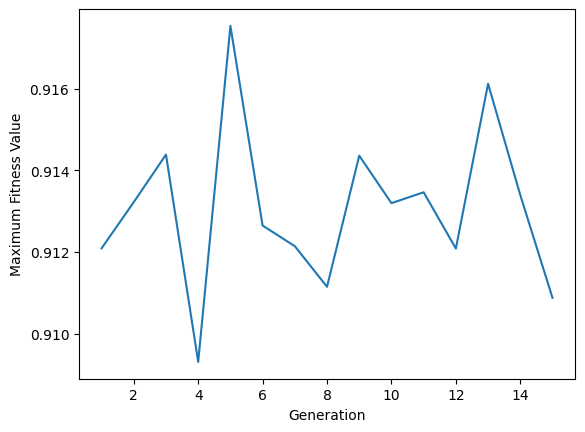

In [ ]:
plt.plot(gen,max_fitness)
plt.ylabel('Maximum Fitness Value')
plt.xlabel('Generation')
plt.show()

In [ ]:
best_features = []
best_f1_score = max(max_fitness)
best_fitness_index = max_fitness.index(max(max_fitness))
best_features = max_features[best_fitness_index]

In [ ]:
selected_column_names = [X.columns[i] for i in range(len(best_features)) if best_features[i] == 1]
print("Selected Column Names:", selected_column_names)
print(best_f1_score)

Selected Column Names: ['itching', 'skin_rash', 'chills', 'joint_pain', 'acidity', 'muscle_wasting', 'vomiting', 'fatigue', 'weight_gain', 'anxiety', 'mood_swings', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'sweating', 'dehydration', 'dark_urine', 'loss_of_appetite', 'constipation', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'swelling_of_stomach', 'swelled_lymph_nodes']
0.9175349866809506


In [ ]:
len(selected_column_names)

26

In [ ]:
X_selected = X[selected_column_names]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7987804878048781
F1 Score: 0.7921137905401738


##### RandomForest


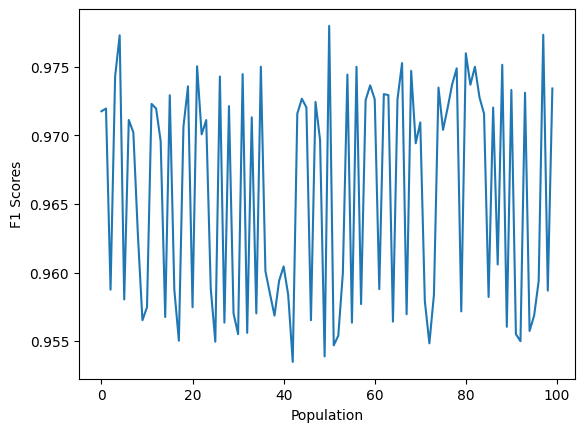


 Generation : 1


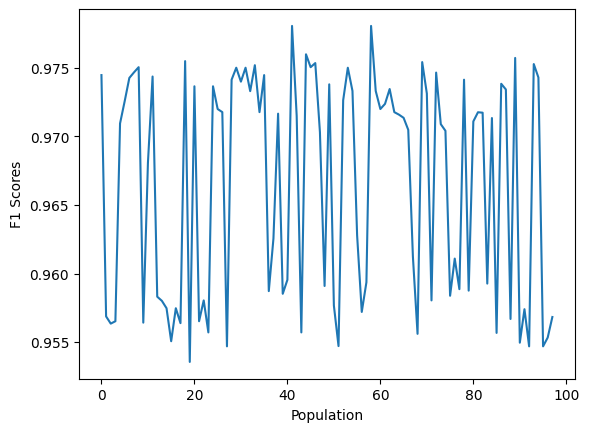


 Generation : 2


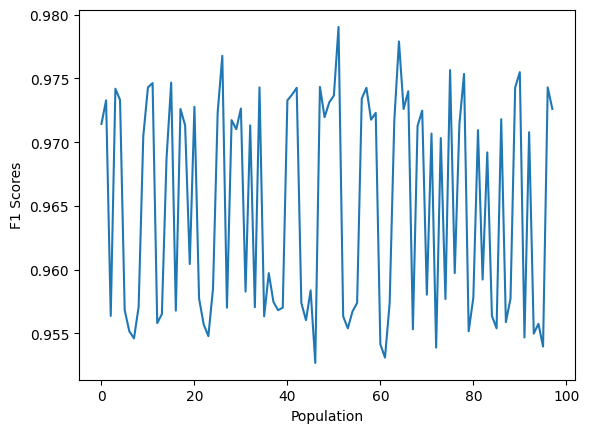


 Generation : 3


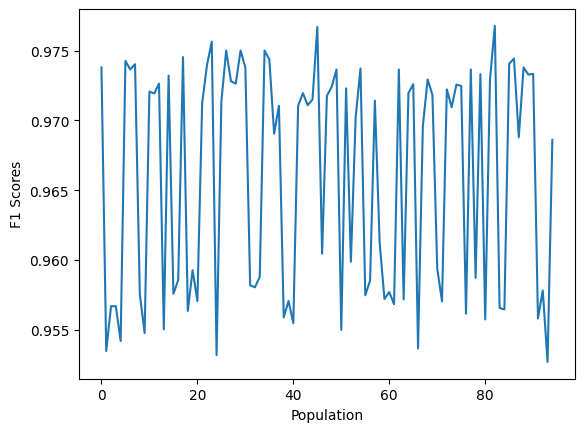


 Generation : 4


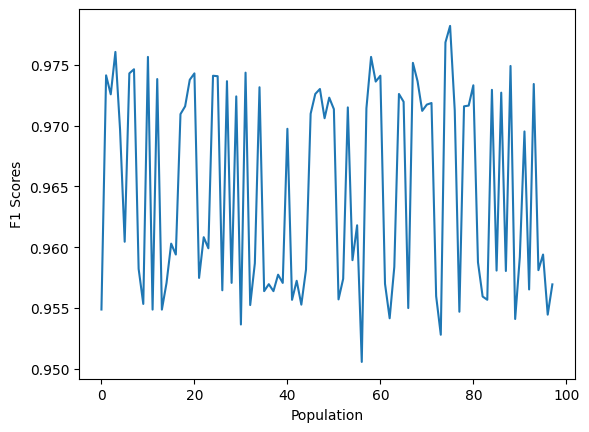


 Generation : 5


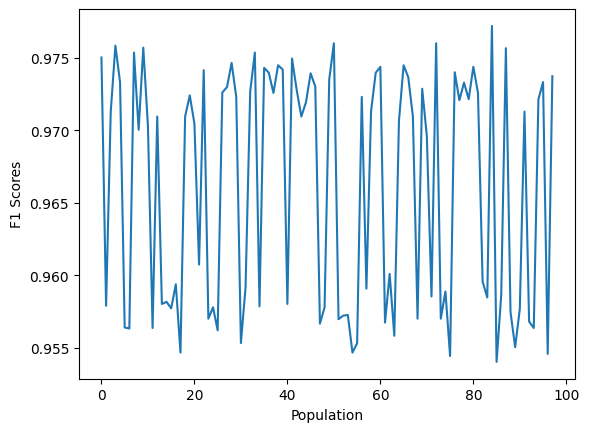


 Generation : 6


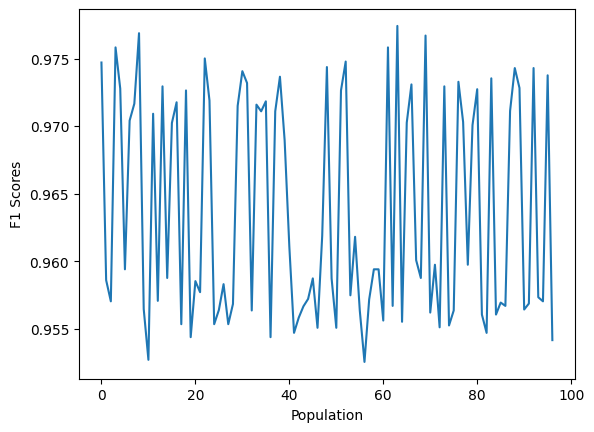


 Generation : 7


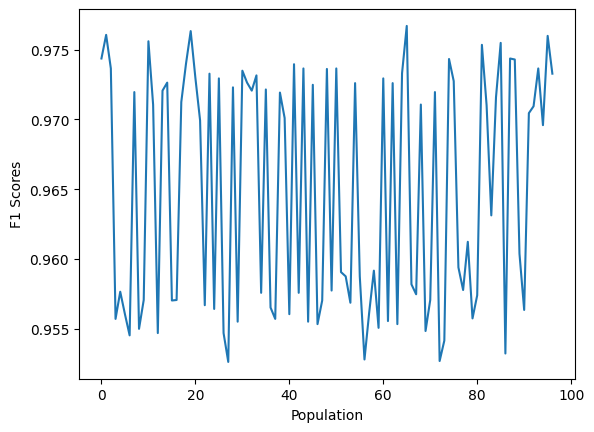


 Generation : 8


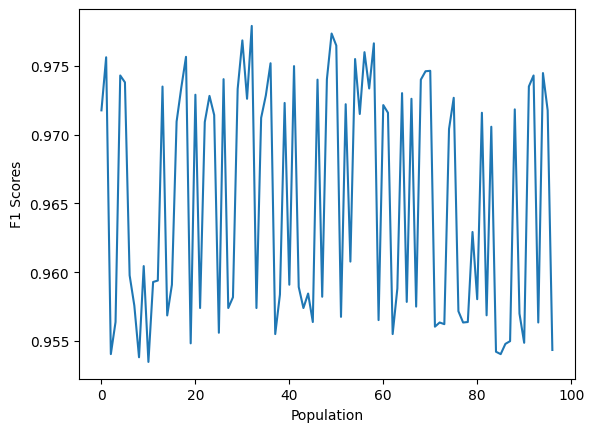


 Generation : 9


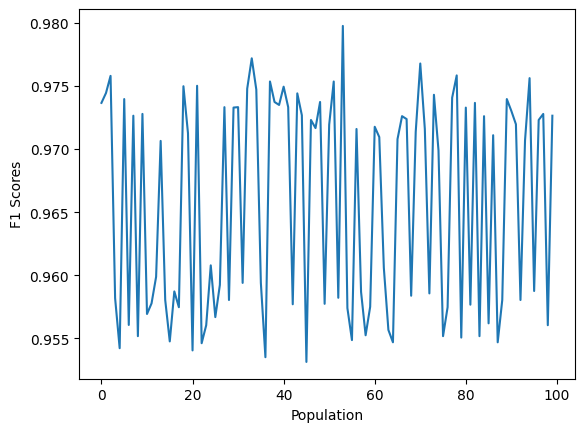


 Generation : 10


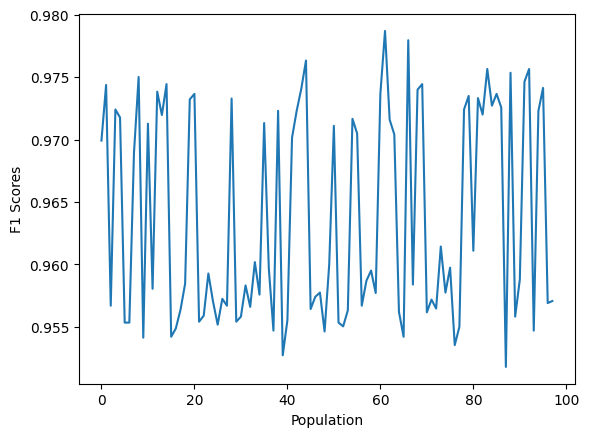


 Generation : 11


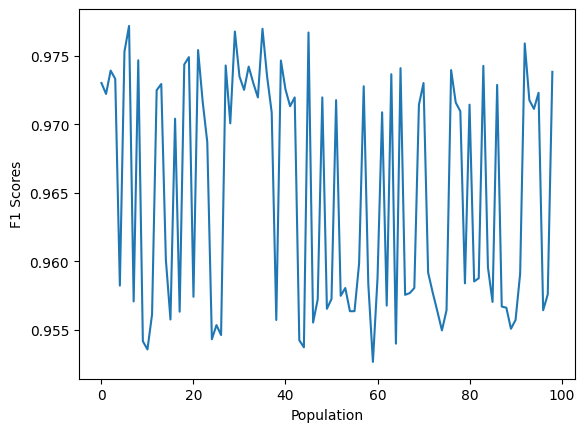


 Generation : 12


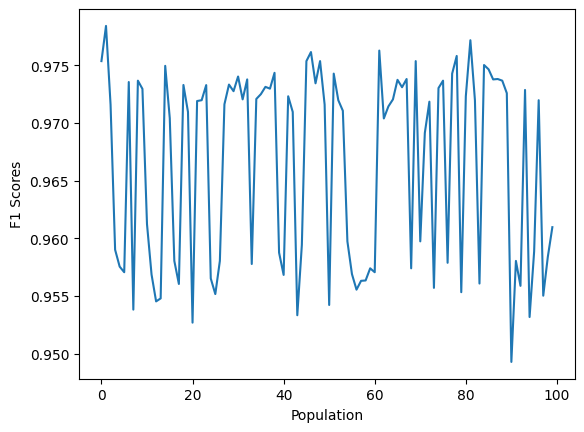


 Generation : 13


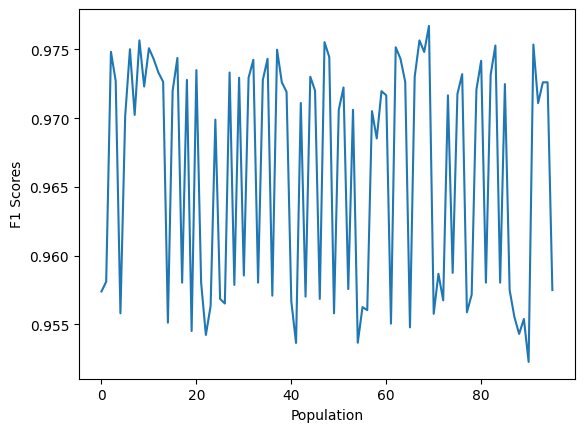


 Generation : 14


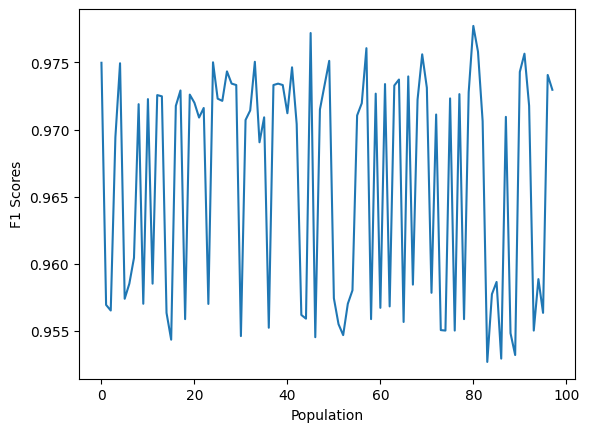


 Generation : 15


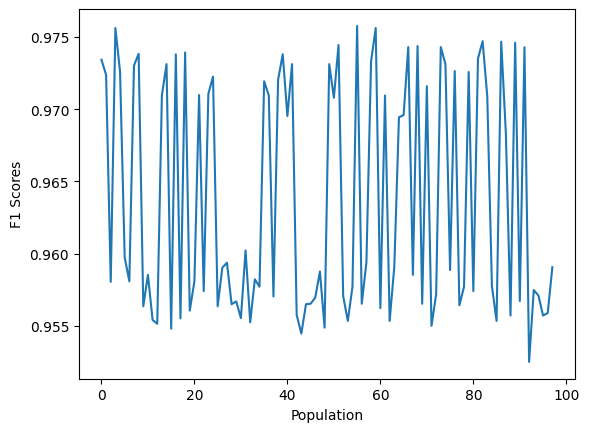

In [ ]:
fitness_values = fitness_function_RF(population, X_fil, y)
max_fitness = []
max_features = []
gen = []
for i in range(15):
   gen.append(i+1)
   print("\n Generation :",i+1)
   parents = select_parents(population, fitness_values)
   crossover_population = two_point_crossover(parents, 0.78)
   mutation(crossover_population)
   fitness_values = fitness_function_RF(crossover_population, X_fil, y)
   a = max(fitness_values)
   index_pop = fitness_values.index(a)
   max_fitness.append(a)
   b = crossover_population[index_pop]
   max_features.append(b)

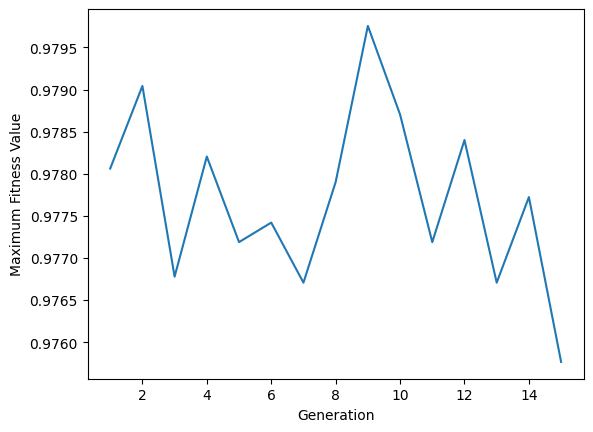

In [ ]:
plt.plot(gen,max_fitness)
plt.ylabel('Maximum Fitness Value')
plt.xlabel('Generation')
plt.show()

In [ ]:
best_features = []
best_f1_score = max(max_fitness)
best_fitness_index = max_fitness.index(max(max_fitness))
best_features = max_features[best_fitness_index]

In [ ]:
selected_column_names = [X.columns[i] for i in range(len(best_features)) if best_features[i] == 1]
print("Selected Column Names:", selected_column_names)
print(best_f1_score)

Selected Column Names: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'joint_pain', 'stomach_pain', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'cold_hands_and_feets', 'restlessness', 'lethargy', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'yellowish_skin', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'yellowing_of_eyes', 'fluid_overload', 'malaise']
0.9797551806345131


In [ ]:
print(len(selected_column_names))

25


In [ ]:
X_selected = X[selected_column_names]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7215447154471545
F1 Score: 0.7213016568337426
